In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Задание 1

In [2]:
a = 0
b = 5
h = 0.5

вычисление интегрального синуса с помощью ряда Тейлора

In [3]:
def sine_integral(x):
    eps = 1e-5
    approximation = 0
    term = math.inf
    
    i = 0
    fact = 1
    while abs(term) >= eps and i <= 1000:
        coefficient = (-1) ** i
        numerator = x ** (2 * i + 1)
        denominator = fact * (2 * i + 1)
        
        term = coefficient * numerator / denominator
        approximation += term
        
        i += 1
        
        fact = fact * (2 * i) * (2 * i + 1)
    
    return approximation, i + 1

In [4]:
df = pd.DataFrame(columns=['x', 'y', 'k'])
df['x'] = np.arange(a, b + h, h)

In [5]:
result = [sine_integral(val) for val in df['x']]
df['y'] = np.array([val[0] for val in result])
df['k'] = np.array([val[1] for val in result])

In [6]:
df

,x,y,k
0,0.0,0.000000,2
1,0.5,0.493107,5
2,1.0,0.946083,6
3,1.5,1.324684,7
4,2.0,1.605413,7
5,2.5,1.778520,8
6,3.0,1.848653,9
7,3.5,1.833125,9
8,4.0,1.758203,10
9,4.5,1.654140,11


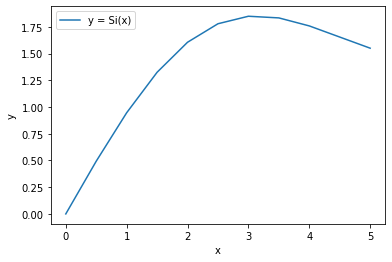

In [7]:
axis = df.plot(x='x', y='y', label='y = Si(x)')
axis.set_xlabel('x')
axis.set_ylabel('y')
plt.legend(loc='upper left')
plt.show()

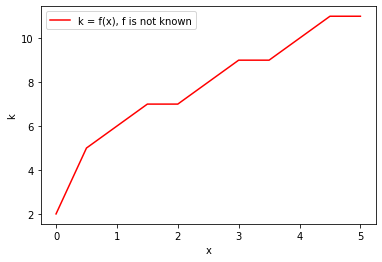

In [8]:
axis = df.plot(x='x', y='k', label='k = f(x), f is not known', c='red')
axis.set_xlabel('x')
axis.set_ylabel('k')
plt.legend(loc='upper left')
plt.show()

# Задание 2

### построение интерполяционого полинома Ньютона

In [9]:
def compute_uniform_nodes(a, b, n):
    return np.linspace(a, b, n)

In [10]:
def compute_chebishev_nodes(a, b, n):
    return [(b - a) / 2 * math.cos((2 * i - 1) * math.pi / (2 * n)) + (a + b) / 2 for i in range(1, n + 1)]

In [11]:
def compute_divided_difference(dd, points):
    for i in range(1, len(points)):
        prev = dd[i - 1]
        for k in range(i, len(points)):
            temp = (dd[k] - prev) / (points[k] - points[k - i])
            prev = dd[k]
            dd[k] = temp
    return dd

In [12]:
def interpolate_by_newton_polynomial(x, ksi, dd):
    result = dd[0]
    koef = 1
    for i in range(1, len(ksi)):
        koef *= (x - ksi[i - 1])
        result += dd[i] * koef
    return result

Строим полином с равномерным распределением узлов и вычислияем в 10 изначальных точках, меняем количество узлов от 10 до 100 по которым строим полином

In [13]:
df_for_plot = pd.DataFrame(columns=['nodes_count', 'max_error'])
for i in range(40, 54, 1):
    x = df['x'].copy()
    si_x = df['y'].copy()
    
    ksi = compute_uniform_nodes(a, b, i)
    divided_difference = [sine_integral(node)[0] for node in ksi]
    divided_difference = compute_divided_difference(divided_difference, ksi)
    polynomial_x = [interpolate_by_newton_polynomial(node, ksi, divided_difference) for node in x]
    
    error = [abs(y1 - y2) for y1, y2 in zip(si_x, polynomial_x)]

    df_for_plot = df_for_plot.append({'nodes_count' : i, 'max_error' : max(error)}, ignore_index=True)
    
    print(pd.DataFrame(data={'x': x, 'Si(x)': si_x, 'polynomial(x)': polynomial_x}))

      x     Si(x)  polynomial(x)
0   0.0  0.000000       0.000000
1   0.5  0.493107       0.493335
2   1.0  0.946083       0.946084
3   1.5  1.324684       1.324684
4   2.0  1.605413       1.605413
5   2.5  1.778520       1.778520
6   3.0  1.848653       1.848652
7   3.5  1.833125       1.833125
8   4.0  1.758203       1.758200
9   4.5  1.654140       1.653340
10  5.0  1.549931       1.549930
      x     Si(x)  polynomial(x)
0   0.0  0.000000       0.000000
1   0.5  0.493107       0.493107
2   1.0  0.946083       0.946083
3   1.5  1.324684       1.324684
4   2.0  1.605413       1.605413
5   2.5  1.778520       1.778520
6   3.0  1.848653       1.848653
7   3.5  1.833125       1.833125
8   4.0  1.758203       1.758203
9   4.5  1.654140       1.654140
10  5.0  1.549931       1.549933
      x     Si(x)  polynomial(x)
0   0.0  0.000000       0.000000
1   0.5  0.493107       0.493191
2   1.0  0.946083       0.946083
3   1.5  1.324684       1.324684
4   2.0  1.605413       1.605413
5   2.5  1

In [14]:
print(df_for_plot)

    nodes_count  max_error
0          40.0   0.000801
1          41.0   0.000002
2          42.0   0.000998
3          43.0   0.007685
4          44.0   0.004134
5          45.0   0.021472
6          46.0   0.009714
7          47.0   0.041799
8          48.0   0.010396
9          49.0   0.053750
10         50.0   0.066860
11         51.0   0.182261
12         52.0   0.194057
13         53.0   0.960061


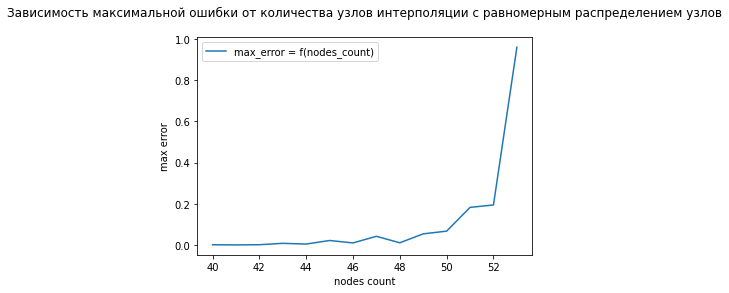

In [15]:
axis = df_for_plot.plot(x='nodes_count', y='max_error', label='max_error = f(nodes_count)')
axis.set_title('Зависимость максимальной ошибки от количества узлов интерполяции с равномерным распределением узлов\n')
axis.set_xlabel('nodes count')
axis.set_ylabel('max error')
plt.legend(loc='upper left')
plt.show()

Строим полином с узлами чебышева узлов и вычислияем в 10 изначальных точках, меняем количество узлов от 10 до 100 по которым строим полином

In [16]:
df_for_plot = pd.DataFrame(columns=['nodes_count', 'max_error'])
for i in range(40, 54, 1):
    x = df['x'].copy()
    si_x = df['y'].copy()
    
    ksi = compute_chebishev_nodes(a, b, i)
    divided_difference = [sine_integral(node)[0] for node in ksi]
    divided_difference = compute_divided_difference(divided_difference, ksi)
    polynomial_x = [interpolate_by_newton_polynomial(node, ksi, divided_difference) for node in x]
    
    error = [abs(y1 - y2) for y1, y2 in zip(si_x, polynomial_x)]

    df_for_plot = df_for_plot.append({'nodes_count' : i, 'max_error' : max(error)}, ignore_index=True)
    
    print(pd.DataFrame(data={'x': x, 'Si(x)': si_x, 'polynomial(x)': polynomial_x}))

      x     Si(x)  polynomial(x)
0   0.0  0.000000      -0.000001
1   0.5  0.493107       0.493107
2   1.0  0.946083       0.946083
3   1.5  1.324684       1.324684
4   2.0  1.605413       1.605413
5   2.5  1.778520       1.778520
6   3.0  1.848653       1.848652
7   3.5  1.833125       1.833125
8   4.0  1.758203       1.758203
9   4.5  1.654140       1.654140
10  5.0  1.549931       1.549931
      x     Si(x)  polynomial(x)
0   0.0  0.000000      -0.000005
1   0.5  0.493107       0.493107
2   1.0  0.946083       0.946083
3   1.5  1.324684       1.324684
4   2.0  1.605413       1.605413
5   2.5  1.778520       1.778520
6   3.0  1.848653       1.848652
7   3.5  1.833125       1.833125
8   4.0  1.758203       1.758203
9   4.5  1.654140       1.654140
10  5.0  1.549931       1.549931
      x     Si(x)  polynomial(x)
0   0.0  0.000000      -0.000014
1   0.5  0.493107       0.493107
2   1.0  0.946083       0.946083
3   1.5  1.324684       1.324684
4   2.0  1.605413       1.605413
5   2.5  1

In [17]:
print(df_for_plot)

    nodes_count  max_error
0          40.0   0.000001
1          41.0   0.000005
2          42.0   0.000014
3          43.0   0.000010
4          44.0   0.000035
5          45.0   0.000622
6          46.0   0.002123
7          47.0   0.006138
8          48.0   0.002914
9          49.0   0.017401
10         50.0   0.057326
11         51.0   0.250373
12         52.0   0.137118
13         53.0   0.433763


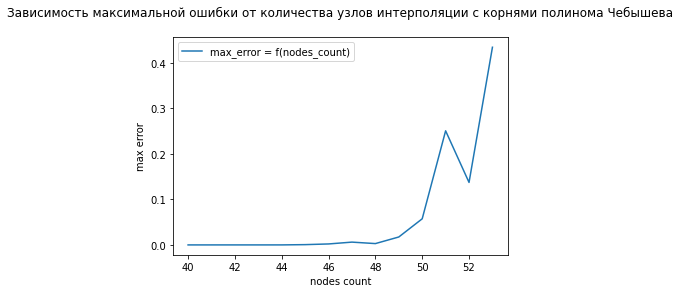

In [18]:
axis = df_for_plot.plot(x='nodes_count', y='max_error', label='max_error = f(nodes_count)')
axis.set_title('Зависимость максимальной ошибки от количества узлов интерполяции с корнями полинома Чебышева\n')
axis.set_xlabel('nodes count')
axis.set_ylabel('max error')
plt.legend(loc='upper left')
plt.show()

# Задание 3

### интегрирование с помощью квадратурных формул

In [19]:
def f(x):
    if x <= 1e-10:
        return 1
    return math.sin(x) / x

In [20]:
def split_into_segments(a, b, n):
    return np.linspace(a, b, n)

In [21]:
def integrate_by_left_rectangles(a, b, n):
    s = 0
    h = (b - a) / (n - 1)
    z = split_into_segments(a, b, n)
    for i in range(1, n):
        s += f(z[i - 1])
    s *= h
    
    return s

In [22]:
def integrate_by_trapeze(a, b, n):
    s = 0
    h = (b - a) / (n - 1)
    z = split_into_segments(a, b, n)
    for i in range(1, n):
        s += f(z[i - 1]) + f(z[i])
    s *= h / 2
    
    return s

In [23]:
def integrate_by_simpson(a, b, n):
    s = 0
    h = (b - a) / (n - 1)
    z = split_into_segments(a, b, n)
    for i in range(1, n):
        s += f(z[i - 1]) + 4 * f((z[i] + z[i - 1]) / 2) + f(z[i])
    s *= h / 6
    
    return s

In [24]:
def integrate_by_gauss_with_2nodes(a, b, n):
    temp = 1 / np.sqrt(3)
    s = 0
    h = (b - a) / (n - 1)
    z = split_into_segments(a, b, n)
    for i in range(1, n):
        s += f(z[i - 1] + h * (1 - temp) / 2) + f(z[i - 1] + h * (1 + temp) / 2)
    s *= h / 2
    
    return s

In [25]:
def task3(integration_function, a, top_limits, eps):
    df3 = pd.DataFrame(columns=['x', 'S(x)', 'N', 'error'])
    
    for x in top_limits:
        n = 8
        S1 = 0
        S2 = 0
        while True and n < 100000:
            S1 = integration_function(a, x, n)
            if abs(S1 - S2) <= eps:
                break
            S2 = S1
            n *= 2
        df3 = df3.append({'x' : x, 'S(x)' : S1, 'N': n, 'error': abs(S1 - sine_integral(x)[0])}, ignore_index=True)
        
    return df3

In [26]:
eps1 = 1e-5
eps2 = 1e-8

In [27]:
task3(integrate_by_left_rectangles, a, df['x'], eps1)

,x,S(x),N,error
0,0.0,0.000000,8.0,0.000000
1,0.5,0.493112,2048.0,0.000005
2,1.0,0.946093,8192.0,0.000010
3,1.5,1.324691,32768.0,0.000008
4,2.0,1.605421,65536.0,0.000008
5,2.5,1.778535,131072.0,0.000014
6,3.0,1.848674,131072.0,0.000022
7,3.5,1.833155,131072.0,0.000030
8,4.0,1.758239,131072.0,0.000036
9,4.5,1.654182,131072.0,0.000042


In [28]:
task3(integrate_by_left_rectangles, a, df['x'], eps2)

,x,S(x),N,error
0,0.0,0.000000,8.0,0.000000e+00
1,0.5,0.493108,131072.0,1.575692e-07
2,1.0,0.946084,131072.0,1.207228e-06
3,1.5,1.324687,131072.0,3.836232e-06
4,2.0,1.605421,131072.0,8.421041e-06
5,2.5,1.778535,131072.0,1.446114e-05
6,3.0,1.848674,131072.0,2.183266e-05
7,3.5,1.833155,131072.0,2.966389e-05
8,4.0,1.758239,131072.0,3.617709e-05
9,4.5,1.654182,131072.0,4.183778e-05


In [29]:
task3(integrate_by_trapeze, a, df['x'], eps1)

,x,S(x),N,error
0,0.0,0.000000,8.0,0.000000e+00
1,0.5,0.493107,64.0,8.525626e-07
2,1.0,0.946082,128.0,1.558307e-06
3,1.5,1.324682,256.0,1.139986e-06
4,2.0,1.605411,256.0,2.132404e-06
5,2.5,1.778519,512.0,8.767135e-07
6,3.0,1.848652,512.0,9.720022e-07
7,3.5,1.833124,512.0,6.496977e-07
8,4.0,1.758201,256.0,2.495788e-06
9,4.5,1.654143,32.0,2.617418e-06


In [30]:
task3(integrate_by_trapeze, a, df['x'], eps2)

,x,S(x),N,error
0,0.0,0.000000,8.0,0.000000e+00
1,0.5,0.493107,1024.0,2.638716e-09
2,1.0,0.946083,4096.0,3.761815e-09
3,1.5,1.324684,8192.0,1.274826e-09
4,2.0,1.605413,8192.0,9.738442e-08
5,2.5,1.778520,8192.0,4.976376e-08
6,3.0,1.848653,16384.0,1.989797e-08
7,3.5,1.833125,16384.0,2.834484e-07
8,4.0,1.758203,8192.0,1.172539e-07
9,4.5,1.654140,1024.0,4.921151e-08


In [31]:
task3(integrate_by_simpson, a, df['x'], eps1)

,x,S(x),N,error
0,0.0,0.000000,8.0,0.000000e+00
1,0.5,0.493107,16.0,6.385260e-10
2,1.0,0.946083,16.0,1.050381e-09
3,1.5,1.324684,16.0,1.024383e-08
4,2.0,1.605413,16.0,1.255596e-07
5,2.5,1.778520,16.0,9.266552e-09
6,3.0,1.848653,16.0,1.023552e-07
7,3.5,1.833125,16.0,3.509071e-07
8,4.0,1.758203,16.0,1.537988e-07
9,4.5,1.654140,16.0,2.282004e-07


In [32]:
task3(integrate_by_simpson, a, df['x'], eps2)

,x,S(x),N,error
0,0.0,0.000000,8.0,0.000000e+00
1,0.5,0.493107,16.0,6.385260e-10
2,1.0,0.946083,32.0,2.198576e-09
3,1.5,1.324684,32.0,2.812891e-09
4,2.0,1.605413,64.0,9.963115e-08
5,2.5,1.778520,64.0,4.635350e-08
6,3.0,1.848653,64.0,2.112563e-08
7,3.5,1.833125,64.0,2.845709e-07
8,4.0,1.758203,64.0,1.150707e-07
9,4.5,1.654140,128.0,4.685290e-08


In [33]:
task3(integrate_by_gauss_with_2nodes, a, df['x'], eps1)

,x,S(x),N,error
0,0.0,0.000000,8.0,0.000000e+00
1,0.5,0.493107,16.0,5.691851e-10
2,1.0,0.946083,16.0,3.075021e-09
3,1.5,1.324684,16.0,2.859299e-09
4,2.0,1.605413,16.0,8.220583e-08
5,2.5,1.778520,16.0,8.373357e-08
6,3.0,1.848652,16.0,3.346605e-08
7,3.5,1.833125,16.0,2.399890e-07
8,4.0,1.758203,16.0,8.903720e-08
9,4.5,1.654141,16.0,2.303437e-07


In [34]:
task3(integrate_by_gauss_with_2nodes, a, df['x'], eps2)

,x,S(x),N,error
0,0.0,0.000000,8.0,0.000000e+00
1,0.5,0.493107,16.0,5.691851e-10
2,1.0,0.946083,32.0,2.309553e-09
3,1.5,1.324684,32.0,2.094728e-09
4,2.0,1.605413,64.0,9.949188e-08
5,2.5,1.778520,64.0,4.665222e-08
6,3.0,1.848653,64.0,2.068942e-08
7,3.5,1.833125,64.0,2.842146e-07
8,4.0,1.758203,64.0,1.148635e-07
9,4.5,1.654140,64.0,4.749421e-08


# Задание 4

### вычисление обратной функции

In [35]:
def compute_inverse_func(x, i):
    return sine_integral(x[0])[0] + i * sine_integral(x[len(x) - 1] - x[0])[0] / len(x)

In [36]:
def compute_g(x, Fi):
    return sine_integral(x)[0] - Fi

In [37]:
def compute_derivative_g(x):
    eps = 1e-5
    approximation = 0
    term = math.inf
    
    i = 0
    while abs(term) >= eps and i <= 1000:
        coefficient = (-1) ** i * (2 * i + 1)
        numerator = x ** (2 * i)
        denominator = math.factorial(2 * i + 1) * (2 * i + 1)
        
        term = coefficient * numerator / denominator
        approximation += term
        
        i += 1
    
    return approximation

In [38]:
def tangent_method(F, eps):
    z = [[i * 2, 0] for i in range(len(F))]
    for i in range(1, len(F)):
        while abs(z[i][0] - z[i - 1][0]) > eps and z[i][1] < 1000:
            z[i][0] = z[i - 1][0] - compute_g(z[i - 1][0], F[i - 1]) / compute_derivative_g(z[i - 1][0])
            z[i][1] += 1
    return z

In [39]:
def chord_method(F, eps):
    z = [[i * 2, 0] for i in range(len(F))]
    for i in range(1, len(F)):
        while abs(z[i][0] - z[i - 1][0]) > eps and z[i][1] < 1000:
            numerator = z[0][0] * compute_g(z[i - 1][0], F[i - 1]) - z[i - 1][0] * compute_g(z[0][0], F[0])
            denominator = compute_g(z[i - 1][0], F[i - 1]) - compute_g(z[0][0], F[0])
            z[i][0] = numerator / denominator
            z[i][1] += 1
    return z